In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
from data.occnet_data_loader import OccnetTfrecordLoader
from network.main import Transformer

In [2]:
import cv2
import math

In [3]:
sess = tf.Session()

In [4]:
vw, vh = 128, 128

In [56]:
occnet_dataloader = OccnetTfrecordLoader("../datasets/000/", occnet_data=True)
occnet_transformer = Transformer(128, 128, "../datasets/000/", occnet=True)
occnet_features = occnet_dataloader.get_features()
# features = sess.run(features)

In [57]:
occnet_features["img0_depth"].shape

TensorShape([Dimension(None), Dimension(307200)])

In [83]:
img0_depth_tensor.shape

TensorShape([Dimension(None), Dimension(480), Dimension(640)])

In [82]:
tf.reshape(scaled[:,:,:2], [scaled[:,:,:2].shape[0], -1])

<tf.Tensor 'Reshape_110:0' shape=(1, 200) dtype=float32>

In [94]:
img0_depth_tensor

<tf.Tensor 'Reshape_98:0' shape=(?, 480, 640) dtype=float32>

In [106]:
scaled[:,:,:2]

<tf.Tensor 'strided_slice_771:0' shape=(1, 100, 2) dtype=float32>

In [144]:
values_at_indices

<tf.Tensor 'GatherNd_27:0' shape=(1, 100, 307200) dtype=float32>

In [261]:
xyz = occnet_transformer.scale_normalized_coords_to_image_coords(uvz_tensor)

x = tf.math.floor(xyz[:, :, 0])
y = tf.math.floor(xyz[:, :, 1])
z = xyz[:, :, 2]

z_index = tf.dtypes.cast(
    tf.clip_by_value(x + y*640, 0.0, 307200-1), 
    tf.int32
)

gt_z_values = []
for i in range(z.shape[0]):
    gt_z_values.append(
        tf.gather(
            occnet_features["img0_depth"][i] / 1000.0,
            z_index[i]
        )
    )
    
gt_z_values = tf.stack(gt_z_values)

error = tf.losses.mean_squared_error(z, gt_z_values)

In [262]:
error_np, z_np, gt_z_values_np = sess.run([error, z, gt_z_values])

In [252]:
z_np

array([[0.19200003, 0.20210105, 0.21220204, 0.22230306, 0.23240408,
        0.24250507, 0.2526061 , 0.2627071 , 0.2728081 , 0.28290913,
        0.29301015, 0.30311114, 0.31321216, 0.32331318, 0.33341417,
        0.3435152 , 0.3536162 , 0.3637172 , 0.37381822, 0.3839192 ,
        0.39402023, 0.40412125, 0.41422224, 0.42432326, 0.43442428,
        0.4445253 , 0.4546263 , 0.46472728, 0.4748283 , 0.48492932,
        0.49503034, 0.50513136, 0.5152323 , 0.52533334, 0.53543437,
        0.5455354 , 0.5556364 , 0.5657374 , 0.57583845, 0.5859394 ,
        0.5960404 , 0.60614145, 0.61624247, 0.6263435 , 0.63644445,
        0.64654547, 0.6566465 , 0.6667475 , 0.67684853, 0.68694955,
        0.6970505 , 0.70715153, 0.71725255, 0.7273536 , 0.7374546 ,
        0.7475556 , 0.7576566 , 0.7677576 , 0.7778586 , 0.78795964,
        0.79806066, 0.8081616 , 0.81826264, 0.82836366, 0.8384647 ,
        0.8485657 , 0.8586667 , 0.86876774, 0.8788687 , 0.8889697 ,
        0.89907074, 0.90917176, 0.9192728 , 0.92

In [239]:
sess.run(gt_z_values)

array([[0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66300005, 0.66300005,
        0.66300005, 0.66300005, 0.66300005, 0.66

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


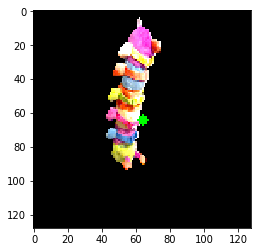

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


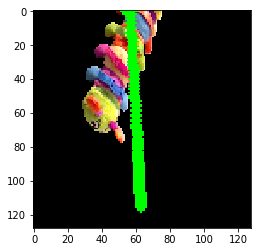

In [260]:
def func1(x):
    return tf.transpose(tf.reshape(occnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]
img0_depth_tensor = tf.reshape(occnet_features["img0_depth"], [-1, 480, 640])

u, v = 0.0, 0.0
points = []
for z in np.linspace(-0.5, 0.5, num=100):
    z_value = (img0_depth_tensor[0, 240, 320] / 1000.0) + z
    points.append([u, v, z_value])

# add back batch dimension
uvz_tensor = tf.expand_dims(tf.convert_to_tensor(points), axis=0)

world_coords = tf.matmul(occnet_transformer.unproject(uvz_tensor), mvi[0])
uvz_proj = occnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1, img0_depth = sess.run(
    [
        uvz_tensor,
        uvz_proj,
        occnet_features["img0"][0, :, :, :3],
        occnet_features["img1"][0, :, :, :3],
        img0_depth_tensor
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)
    try:
        u, v, z = point
        
#         x = int((u + 1.0) * 64.0)
#         y = 128 - int((v + 1.0) * 64.0)
        
        x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
        y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
        if math.isnan(x) or math.isnan(y):
            pass

        x = int(round(x))
        y = int(round(y))

        new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)
    except:
        pass

plt.imshow(new_img1)
plt.show()

# plt.imshow(img0_depth[0])
# plt.show()


In [14]:
keypointnet_dataloader = OccnetTfrecordLoader("../../data/cars_with_keypoints/", occnet_data=False)
keypointnet_transformer = Transformer(128, 128, "../../data/cars_with_keypoints/", occnet=False)
keypointnet_features = keypointnet_dataloader.get_features()
# keypointnet_features = sess.run(keypointnet_features)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


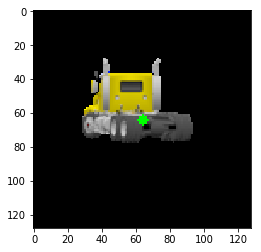

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


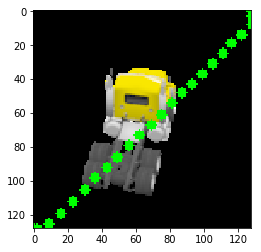

In [8]:
def func1(x):
    return tf.transpose(tf.reshape(keypointnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]

u, v = 0.0, 0.0
points = []
for z in np.linspace(-50.0, 0.0, num=200):
    points.append([u, v, z])
    
uvz = tf.constant([points])

world_coords = tf.matmul(keypointnet_transformer.unproject(uvz), mvi[0])
uvz_proj = keypointnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1 = sess.run(
    [
        uvz,
        uvz_proj,
        keypointnet_features["img0"][0, :, :, :3],
        keypointnet_features["img1"][0, :, :, :3]
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)

    u, v, z = point
    # ---
#     x = int((u + 1.0) * 64.0)
#     y = 128 - int((v + 1.0) * 64.0)
    # OR
    x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
    y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
    x = int(round(x))
    y = int(round(y))
    
    new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)

plt.imshow(new_img1)
plt.show()
